In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime

import plotly.express as px
import plotly.graph_objs as go

import yfinance as yf

import pandas_datareader as pdr

from sklearn.preprocessing import MinMaxScaler

In [30]:
ticker = "AMZN"

In [31]:
yf.download(ticker)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...
2023-06-05,123.360001,125.800003,123.029999,125.300003,125.300003,47950100
2023-06-06,125.070000,127.400002,125.000000,126.610001,126.610001,45695200
2023-06-07,127.010002,127.370003,120.629997,121.230003,121.230003,95663300


In [32]:
df = yf.download(ticker, start="2020-01-01", end="2023-06-09")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000
...,...,...,...,...,...,...
2023-06-02,124.919998,126.389999,124.019997,124.250000,124.250000,61215000
2023-06-05,123.360001,125.800003,123.029999,125.300003,125.300003,47950100
2023-06-06,125.070000,127.400002,125.000000,126.610001,126.610001,45695200


In [33]:
df.reset_index(inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
1,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
3,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
4,2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000
...,...,...,...,...,...,...,...
860,2023-06-02,124.919998,126.389999,124.019997,124.250000,124.250000,61215000
861,2023-06-05,123.360001,125.800003,123.029999,125.300003,125.300003,47950100
862,2023-06-06,125.070000,127.400002,125.000000,126.610001,126.610001,45695200
863,2023-06-07,127.010002,127.370003,120.629997,121.230003,121.230003,95663300


In [50]:
## visualizations
import nbformat
fig = px.line(df, x = df['Date'], y = df['Open'], title='Open price of the given stock')
fig.show()

In [51]:
## closing price

fig = px.line(df, x = df['Date'], y = df['Close'], title="Closing price")
fig

In [52]:
## making the candle stick chart for the given ticker symbol
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open = df['Open'],
                high = df['High'],
                low = df['Low'],
                close = df['Close'])])
fig.show()

In [54]:
window = 50

ts = df['Close']

ts_moving_avg = ts.rolling(window=window).mean()

ts_moving_avg

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
860    107.4168
861    107.9486
862    108.5182
863    108.9820
864    109.5222
Name: Close, Length: 865, dtype: float64

In [55]:
## calculating the 50 days moving average of the given ticker

df['Price'] = df['SMA_50'] = df['Close'].rolling(window=50).mean()
fig = px.line(df, x = df['Date'], y = df['Price'], title='50-day SMA', labels={"50-dat SMA"})
fig.update_traces(line = dict(color='green'))
fig.show()

In [56]:
## calculating the 200 day moving average
## calculating the 50 days moving average of the given ticker

df['Price'] = df['SMA_50'] = df['Close'].rolling(window=200).mean()
fig = px.line(df, x = df['Date'], y = df['Price'], title='200-day SMA', labels={"50-dat SMA"})
fig.update_traces(line = dict(color='green'))
fig.show()

In [57]:
## plotting the EXPONENTIAL MOVING AVERAGE GRAPH(EMA)

## the adjust is kept as 'false' in order to calculate the fixed number of periods regardless of any missing values

df['Price'] = df['EMA_50'] = df['Close'].ewm(span=50, adjust = False).mean()
fig = px.line(df, x = df['Date'], y = df['Price'], title='50-day EMA', labels={"50-dat EMA"})
fig.update_traces(line = dict(color='red'))
fig.show()

In [34]:
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

822

In [35]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.1248729 ],
       [0.11387533],
       [0.12719746],
       [0.12909727],
       [0.12198991],
       [0.12632397],
       [0.11778462],
       [0.12167009],
       [0.11123575],
       [0.10769398],
       [0.11529304],
       [0.10898278],
       [0.12200418],
       [0.11983715],
       [0.11846241],
       [0.10751263],
       [0.09161771],
       [0.10350785],
       [0.10577517],
       [0.1118276 ],
       [0.17771751],
       [0.17556002],
       [0.19726396],
       [0.1925862 ],
       [0.19753126],
       [0.21139754],
       [0.23747385],
       [0.24553584],
       [0.24992722],
       [0.24509192],
       [0.23793205],
       [0.24786041],
       [0.25480549],
       [0.24663367],
       [0.21936412],
       [0.17798962],
       [0.16054341],
       [0.16381307],
       [0.11832876],
       [0.11806627],
       [0.15157448],
       [0.13011396],
       [0.16201829],
       [0.13729291],
       [0.12634305],
       [0.07838152],
       [0.12191831],
       [0.088

In [36]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.1248729 , 0.11387533, 0.12719746, 0.12909727, 0.12198991,
       0.12632397, 0.11778462, 0.12167009, 0.11123575, 0.10769398,
       0.11529304, 0.10898278, 0.12200418, 0.11983715, 0.11846241,
       0.10751263, 0.09161771, 0.10350785, 0.10577517, 0.1118276 ,
       0.17771751, 0.17556002, 0.19726396, 0.1925862 , 0.19753126,
       0.21139754, 0.23747385, 0.24553584, 0.24992722, 0.24509192,
       0.23793205, 0.24786041, 0.25480549, 0.24663367, 0.21936412,
       0.17798962, 0.16054341, 0.16381307, 0.11832876, 0.11806627,
       0.15157448, 0.13011396, 0.16201829, 0.13729291, 0.12634305,
       0.07838152, 0.12191831, 0.08804731, 0.01919321, 0.07093045,
       0.02517885, 0.08183253, 0.09241007, 0.11672023, 0.10009019,
       0.12717365, 0.14496349, 0.11906388, 0.15230953, 0.1258705 ])]
[0.15634773180813177]

[array([0.1248729 , 0.11387533, 0.12719746, 0.12909727, 0.12198991,
       0.12632397, 0.11778462, 0.12167009, 0.11123575, 0.10769398,
       0.11529304, 0.10898278, 0.12

In [43]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=30)

Epoch 1/30
762/762 [==============================] - 15s 15ms/step - loss: 0.0075
Epoch 2/30
762/762 [==============================] - 11s 15ms/step - loss: 0.0029
Epoch 3/30
762/762 [==============================] - 11s 15ms/step - loss: 0.0022
Epoch 4/30
762/762 [==============================] - 12s 16ms/step - loss: 0.0018
Epoch 5/30
762/762 [==============================] - 11s 14ms/step - loss: 0.0016
Epoch 6/30
762/762 [==============================] - 11s 14ms/step - loss: 0.0017
Epoch 7/30
762/762 [==============================] - 11s 14ms/step - loss: 0.0016
Epoch 8/30
762/762 [==============================] - 11s 15ms/step - loss: 0.0017
Epoch 9/30
762/762 [==============================] - 11s 15ms/step - loss: 0.0015
Epoch 10/30
762/762 [==============================] - 11s 15ms/step - loss: 0.0014
Epoch 11/30
762/762 [==============================] - 11s 14ms/step - loss: 0.0015
Epoch 12/30
762/762 [==============================] - 11s 15ms/step - loss: 0.0015
E

In [44]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 13ms/step


2.538804047094659

C:\Users\SWAPNIL BISWAS\AppData\Local\Temp\ipykernel_17996\2388977846.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



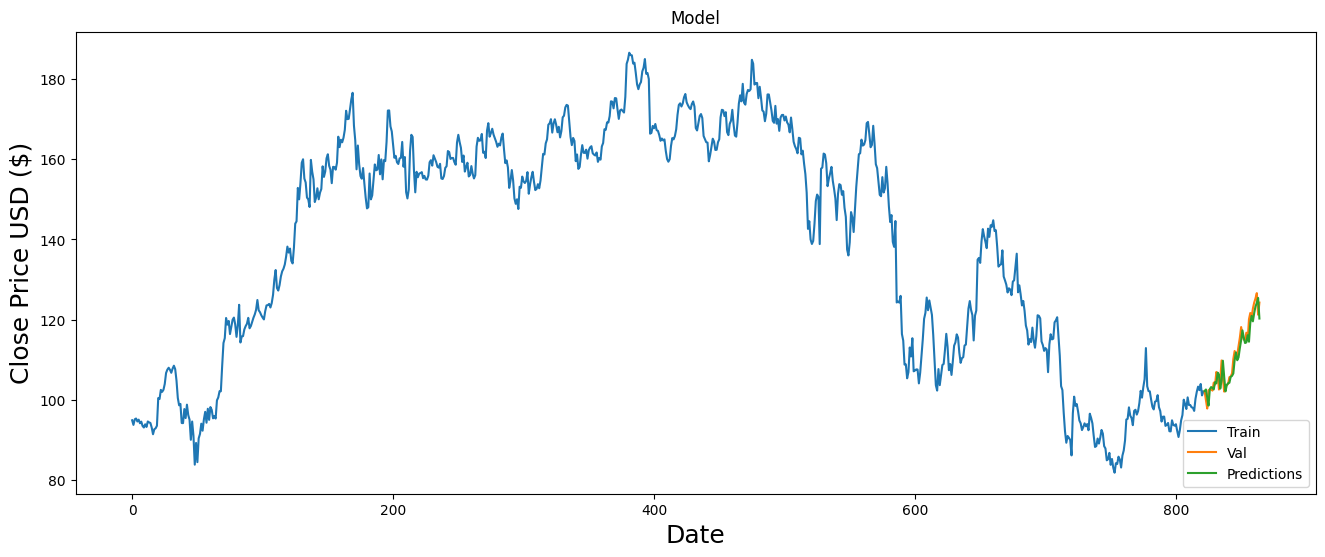

In [47]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [49]:
# Show the valid and predicted prices
valid

,Close,Predictions
822,102.169998,102.197853
823,99.919998,102.577721
824,97.830002,100.550377
825,102.400002,98.559921
826,102.510002,102.666443
827,102.739998,103.182915
828,102.300003,102.998932
829,104.300003,102.590492
830,103.809998,104.403450
831,106.959999,104.108162
